https://github.com/4GeeksAcademy/Hector-regularized-LinearReg.git

In [2]:
# Your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep = ",")
data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [4]:
#Filtraremos y procesaremos los datos de df
data = data.drop_duplicates().reset_index(drop = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [6]:
#Localizamos los nombre de las columnas objeto
object_columns = data.select_dtypes(include=['object']).columns
print(object_columns)

Index(['COUNTY_NAME', 'STATE_NAME'], dtype='object')


In [7]:
#Transformamos los datos ds tipo objeto

# Crear un diccionario para almacenar un LabelEncoder para cada columna categórica
le_dict = {}

# Identificar las columnas categóricas
categorical_cols = ["COUNTY_NAME", "STATE_NAME"]

# Aplicar LabelEncoder a cada columna categórica
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    le_dict[col] = le  # Guardar el encoder en el diccionario

#df_with_dummies = pd.get_dummies(data, columns=['COUNTY_NAME','STATE_NAME'],drop_first=False) # creamos las dummies de 'neighbourhood_group' y 'room_type'
#df_with_dummies = df_with_dummies.astype(int) 
data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [8]:
data.nunique().sort_values()

Urban_rural_code                                                             6
Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)      30
Active General Surgeons per 100000 Population 2018 (AAMC)                   32
CKD_Lower 95% CI                                                            39
CKD_prevalence                                                              43
                                                                          ... 
60-69 y/o % of total pop                                                  3139
80+ y/o % of total pop                                                    3139
70-79 y/o % of total pop                                                  3139
% White-alone                                                             3139
fips                                                                      3140
Length: 108, dtype: int64

In [9]:
data['target']=data['Active Primary Care Physicians per 100000 Population 2018 (AAMC)']
data=data.drop(columns=['Active Primary Care Physicians per 100000 Population 2018 (AAMC)'])
#data['Active Primary Care Physicians per 100000 Population 2018 (AAMC)']

In [10]:
#Separar los data frame del train y test
X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
#Esclar las expresiones
# Escalamos las expresiones de genes para que tengan una misma escala y contribución
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [12]:
#Regresion lineal
m_lineal = LinearRegression().fit(X_train_sc, y_train)
y_pred_linear_train = m_lineal.predict(X_train_sc)
y_pred_linear_test = m_lineal.predict(X_test_sc)

In [13]:
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])

In [14]:
get_metrics(y_pred_linear_test, y_test, y_pred_linear_train, y_train)

,R2,Median AE,MAPE
Train set,0.997440,0.405327,0.528798
Test set,0.997275,0.416670,0.539030
Diferencia,-0.000165,0.011343,0.010232


In [15]:
m_lineal.coef_

array([ 5.55113140e+00, -2.18236286e+00,  2.14304488e+00, -4.58457516e+06,
        5.32690925e-01, -3.87985673e+06, -2.20884398e+00, -6.73632193e+06,
       -2.22546032e+00, -3.72468463e+06, -2.39135415e+00, -2.89968872e+06,
       -6.30386346e-02, -3.21629422e+06, -1.28474029e-02, -5.40160123e+06,
        6.90818574e-01, -4.70747768e+06,  1.18568137e-01, -3.30431562e+06,
       -4.99712407e+00, -4.13637163e+07, -1.16428723e+00, -3.66153795e+07,
       -7.71071673e-02, -1.95104426e+07, -1.06456819e+00, -7.25050300e+06,
       -7.00404312e-03, -2.68204442e+06, -2.06005079e-01, -3.81827808e+06,
       -6.25831653e+00,  1.12358518e-01, -9.25308280e-03,  1.27020248e-01,
       -1.11571112e-01, -1.68117450e-01,  4.54109751e-01,  2.39268374e+00,
       -2.39705463e+00,  3.66316574e-01,  1.49252679e+00, -7.31944635e-01,
        9.76617118e-01,  1.86510695e+00,  2.15101752e+00,  1.55671854e+00,
        2.79435955e+00,  9.96902417e-02, -1.11411861e-02,  9.29197352e-02,
       -1.58792591e-01, -

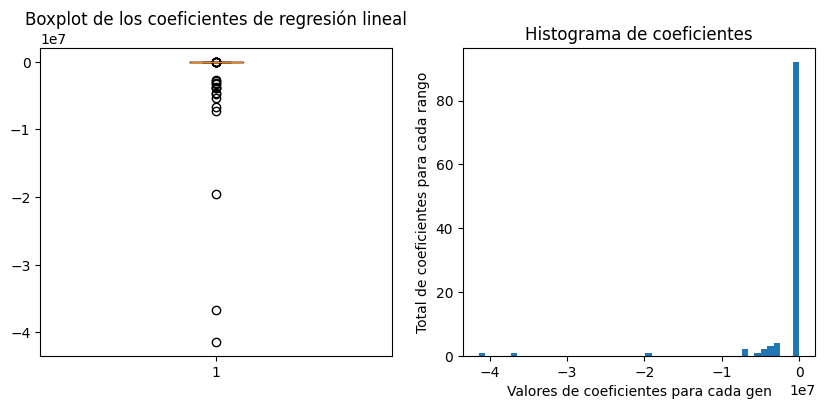

In [16]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_lineal.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_lineal.coef_,50)
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

In [17]:
m_lasso = LassoCV(alphas=np.logspace(-6,6,10), cv=5, random_state=42, n_jobs=-1).fit(X_train_sc, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309.62613965831645, tolerance: 32.83549138576406
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.54588464937115, tolerance: 32.2820203902439
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382.15108981444166, tolerance: 32.83549138576406
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coo

In [18]:
y_pred_lasso_train = m_lasso.predict(X_train_sc)
y_pred_lasso_test = m_lasso.predict(X_test_sc)

In [19]:
get_metrics(y_pred_linear_test, y_test, y_pred_linear_train, y_train)

,R2,Median AE,MAPE
Train set,0.997440,0.405327,0.528798
Test set,0.997275,0.416670,0.539030
Diferencia,-0.000165,0.011343,0.010232


In [20]:
get_metrics(y_pred_lasso_test, y_test, y_pred_lasso_train, y_train)

,R2,Median AE,MAPE
Train set,0.997315,0.412415,0.537083
Test set,0.997228,0.417475,0.545647
Diferencia,-0.000086,0.005061,0.008564


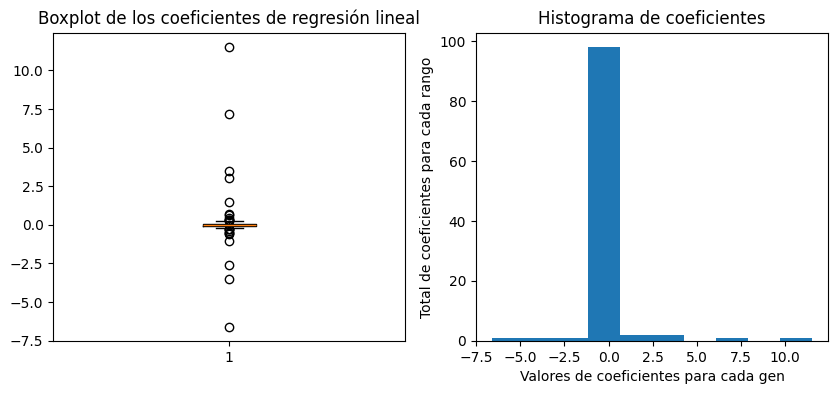

In [21]:

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_lasso.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_lasso.coef_,10)
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

In [22]:

print(f'Porcentaje de variables canceladas -> {round(len(m_lasso.coef_[np.abs(m_lasso.coef_)==0])/len(m_lasso.coef_)*100,2)}%')
print(f'Modelo utiliza -> {len(m_lasso.coef_[np.abs(m_lasso.coef_)>0])} variables.')

Porcentaje de variables canceladas -> 20.56%
Modelo utiliza -> 85 variables.


In [23]:
m_ridge = RidgeCV(alphas=np.logspace(-6,6,10), cv=5).fit(X_train_sc, y_train)

In [24]:
y_pred_ridge_train = m_ridge.predict(X_train_sc)
y_pred_ridge_test = m_ridge.predict(X_test_sc)

In [25]:
get_metrics(y_pred_ridge_test, y_test, y_pred_ridge_train, y_train)

,R2,Median AE,MAPE
Train set,0.997423,0.407320,0.528251
Test set,0.997314,0.422358,0.537717
Diferencia,-0.000109,0.015037,0.009465


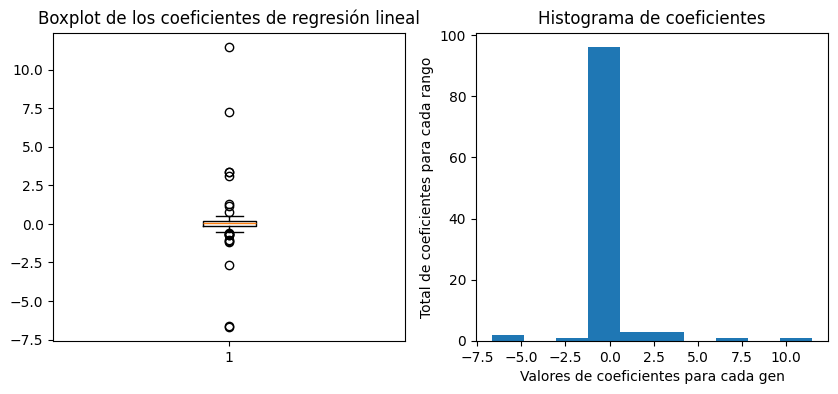

In [26]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_ridge.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_ridge.coef_,10)
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

In [27]:
print(f'Porcentaje de variables canceladas -> {round(len(m_ridge.coef_[np.abs(m_ridge.coef_)==0])/len(m_ridge.coef_)*100,2)}%')
print(f'Modelo utiliza -> {len(m_ridge.coef_[np.abs(m_ridge.coef_)>0])} variables.')

Porcentaje de variables canceladas -> 0.0%
Modelo utiliza -> 107 variables.


In [28]:
#Hipostesis de L1 para seleccionar variables
#Hipostesis de L2 para reduccion de un posible overfitting
X_train_v1 = X_train_sc[:,np.where(np.abs(m_lasso.coef_)>0)[0]]
X_test_v1 = X_test_sc[:,np.where(np.abs(m_lasso.coef_)>0)[0]]

In [29]:
m_ridge_v1 = RidgeCV(alphas=np.logspace(-6,6,10), cv=5).fit(X_train_v1, y_train)

In [30]:
y_pred_ridge_train_v1 = m_ridge_v1.predict(X_train_v1)
y_pred_ridge_test_v1 = m_ridge_v1.predict(X_test_v1)

In [31]:
get_metrics(y_pred_ridge_test_v1, y_test, y_pred_ridge_train_v1, y_train)

,R2,Median AE,MAPE
Train set,0.997413,0.410835,0.529472
Test set,0.997324,0.418015,0.539002
Diferencia,-0.000089,0.007180,0.009530


In [32]:
get_metrics(y_pred_lasso_test, y_test, y_pred_lasso_train, y_train)

,R2,Median AE,MAPE
Train set,0.997315,0.412415,0.537083
Test set,0.997228,0.417475,0.545647
Diferencia,-0.000086,0.005061,0.008564


In [33]:
np.where(np.abs(m_lasso.coef_)>0)[0]

array([  0,   1,   3,   4,   5,   7,   9,  12,  13,  15,  16,  17,  18,
        19,  20,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  33,
        34,  35,  37,  39,  40,  41,  42,  43,  44,  45,  46,  47,  49,
        50,  52,  54,  55,  56,  57,  58,  59,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  84,  85,  87,  88,  89,  90,  91,  93,  94,  95,
        96,  97,  98, 101, 102, 103, 106])